# Aircraft Price Analysis & Prediction Dataset

## Frame the Problem and look at the big picture

### About Dataset

A dataset for aircraft price prediction

model_name: Name of the aircraft model.

engine_type: Type of the engine.

engine_power: Power of the engine. (hp or lbs)

max_speed: Maximum speed of the aircraft. (Knots)

cruise_speed: Cruise speed of the aircraft. (Knots)

stall_speed: Minimum speed of the aircraft to prevent stalling. (Knots)

fuel_tank: Fuel tank capacity of the aircraft. (gal)

all_eng_roc: All Engine Rate of Climb. The maximum altitude of the aircraft at full power. (feet)

out_eng_roc: Out Engine Rate of Climb. The maximum altitude of the aircraft at out power. (feet)

takeoff_distance: The minimum distance required for an aircraft to take off. (feet)

landing_distance: The minimum distance required for an aircraft to landing. (feet)

empty_weight: Empty weight of the aircraft. (lbs)

length: Length of the aircraft. (inch)

wing_span: Wing span of the aircraft. (inch)

range: Range of the aircraft. (nmi)

price: Price of the aircraft.

## Import Libraries, Get Data and Split Data 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
import joblib

In [29]:
aircraft = pd.read_csv('aircraft_price.csv')

In [30]:
aircraft.head()

,model_name,engine_type,engine_power,max_speed,cruise_speed,stall_speed,fuel_tank,all_eng_roc,out_eng_roc,takeoff_distance,landing_distance,empty_weight,length,wing_span,range,price
0,100 Darter (S.L. Industries),Piston,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,303.0,449.0,370.0,1300000.0
1,7 CCM Champ,Piston,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,247.0,433.0,190.0,1230000.0
2,100 Darter (S.L. Industries),Piston,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,257.0,420.0,210.0,1600000.0
3,7 AC Champ,Piston,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,257.0,420.0,210.0,1300000.0
4,100 Darter (S.L. Industries),Piston,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,257.0,420.0,175.0,1250000.0


## Explore the Data to Get Insights

In [31]:
aircraft.size

8272

In [32]:
aircraft.shape

(517, 16)

In [33]:
aircraft.describe()

,engine_power,max_speed,cruise_speed,stall_speed,fuel_tank,all_eng_roc,out_eng_roc,takeoff_distance,landing_distance,empty_weight,length,wing_span,range,price
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.070000e+02
mean,869.328820,212.794971,200.177950,60.656673,1419.379110,1717.558994,2047.065764,1732.750484,7485.489362,4377.445841,387.247582,472.535783,911.448743,2.362673e+06
std,1783.602771,114.106830,103.358089,16.432874,4278.320773,1453.489518,1123.433947,713.646967,10289.442474,5649.707682,140.440740,102.540298,696.429643,1.018731e+06
min,60.000000,64.000000,70.000000,27.000000,12.000000,360.000000,457.000000,500.000000,567.000000,23.000000,211.000000,192.000000,117.000000,6.500000e+05
25%,200.000000,143.000000,131.000000,50.000000,50.000000,924.000000,1365.000000,1265.000000,2650.000000,1575.000000,302.000000,420.000000,517.000000,1.600000e+06
50%,285.000000,177.000000,169.000000,56.000000,89.000000,1200.000000,1706.000000,1525.000000,3625.000000,2286.500000,337.000000,438.000000,713.000000,2.000000e+06
75%,550.000000,238.000000,229.000000,73.000000,335.000000,1861.000000,2280.000000,2110.000000,8800.000000,5164.000000,426.000000,507.000000,1100.000000,2.950000e+06
max,14750.000000,755.000000,511.000000,115.000000,41000.000000,11673.000000,6400.000000,4850.000000,89400.000000,46800.000000,1157.000000,1122.000000,6500.000000,5.100000e+06


In [34]:
aircraft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_name        517 non-null    object 
 1   engine_type       517 non-null    object 
 2   engine_power      517 non-null    float64
 3   max_speed         517 non-null    float64
 4   cruise_speed      517 non-null    float64
 5   stall_speed       517 non-null    float64
 6   fuel_tank         517 non-null    float64
 7   all_eng_roc       517 non-null    float64
 8   out_eng_roc       517 non-null    float64
 9   takeoff_distance  517 non-null    float64
 10  landing_distance  517 non-null    float64
 11  empty_weight      517 non-null    float64
 12  length            517 non-null    float64
 13  wing_span         517 non-null    float64
 14  range             517 non-null    float64
 15  price             507 non-null    float64
dtypes: float64(14), object(2)
memory usage: 64.8

In [35]:
aircraft['model_name'].value_counts()

model_name
100 Darter (S.L. Industries)                                 234
7 AC Champ                                                     1
PA-60-700P Aerostar (preliminary)                              1
PA-601P pressurized Aerostar ('77 service ceiling=26,350)      1
PA-601, 601A, turbochg Aerostar                                1
                                                            ... 
C90A King Air (LJ-1063 up) (10,100 g/w=SN1138 up)              1
A 90 King Air                                                  1
88 Queen Air pressurized                                       1
B 80 Queen Air - specs thru 1972                               1
7 CCM Champ                                                    1
Name: count, Length: 284, dtype: int64

In [36]:
aircraft['engine_type'].value_counts()

engine_type
Piston     385
Jet         74
Propjet     58
Name: count, dtype: int64

In [37]:
X = aircraft.drop('price', axis = 1)
y = aircraft['price']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
explore_df          = X_train_full.copy()
explore_df['price'] = y_train_full

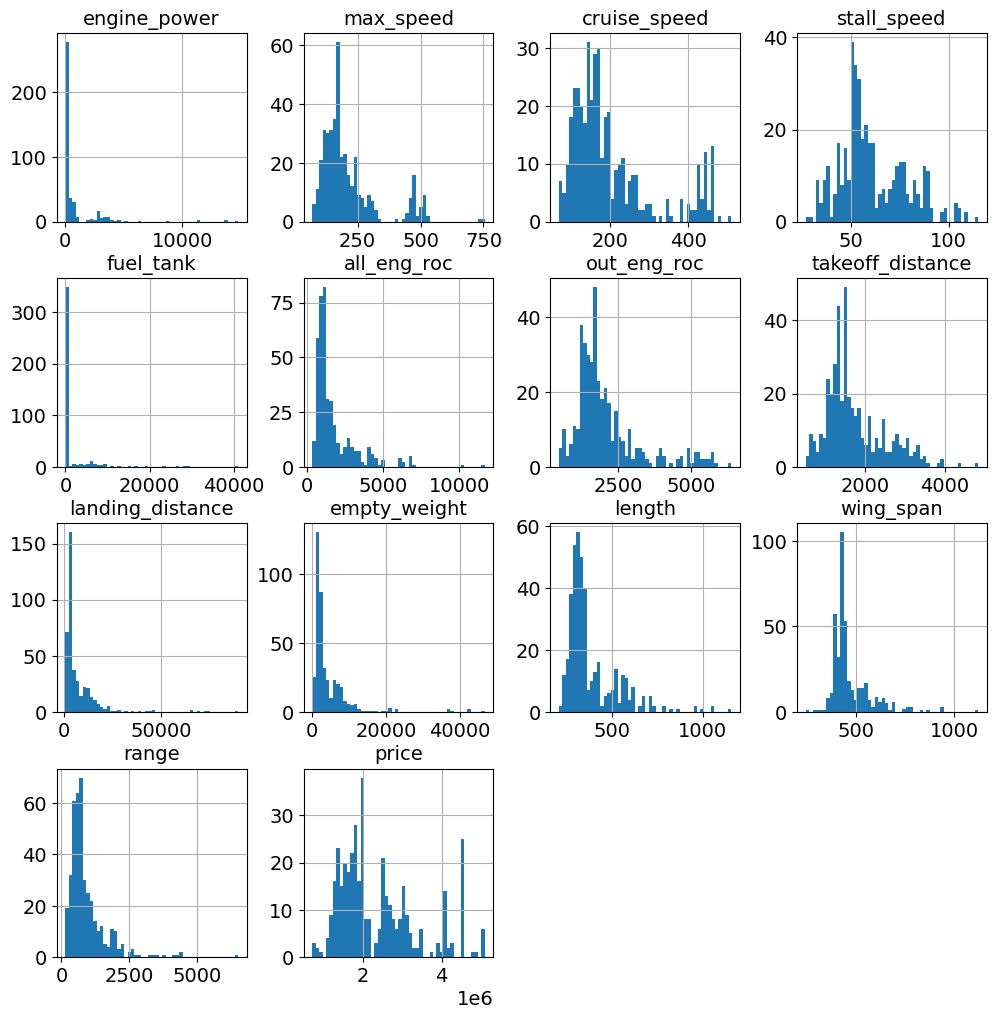

In [47]:
## Visualize Numerical Features

plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)

explore_df.hist(bins = 50, figsize = (12, 12))
plt.show()

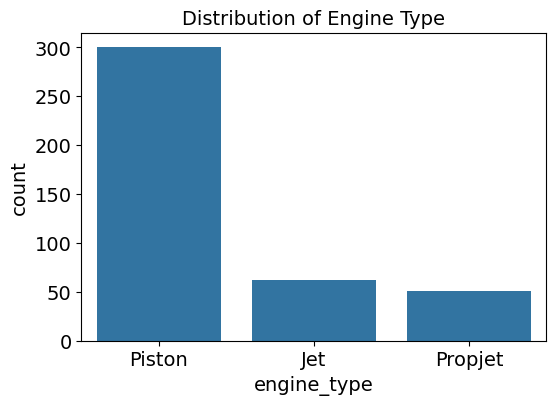

In [51]:
## Visualize Categorical Feature

plt.figure(figsize = (6, 4))
sns.countplot(x = 'engine_type', data = explore_df, order = explore_df['engine_type'].value_counts().index)
plt.title('Distribution of Engine Type')
plt.show()

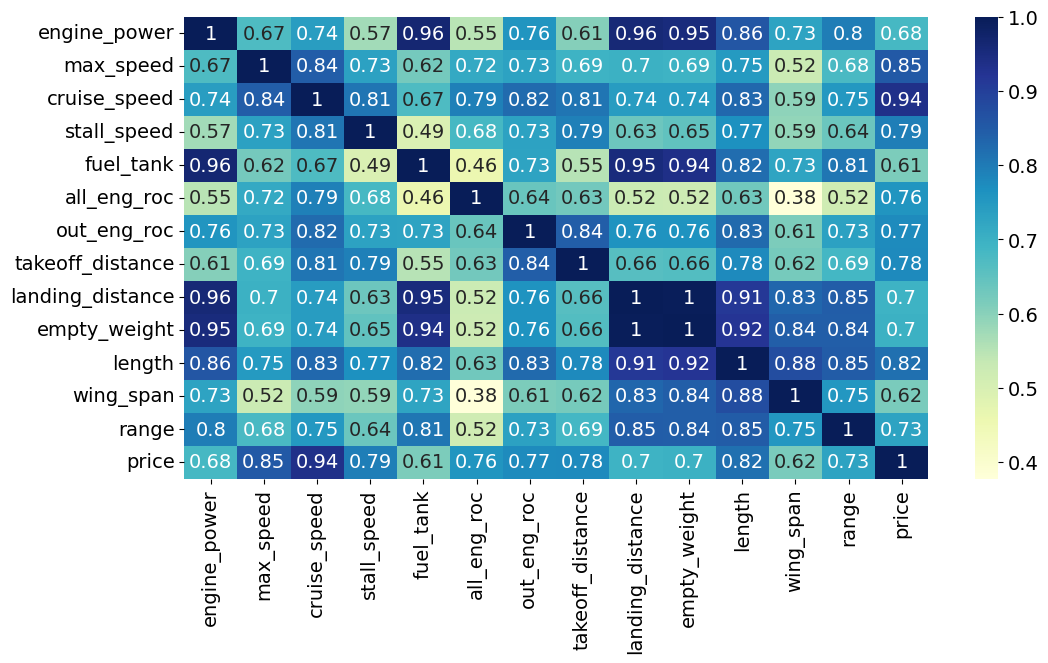

In [ ]:
## Looking for Correlations

plt.figure(figsize = (12, 6))
corr_matrix = explore_df.corr(numeric_only = True)

sns.heatmap(corr_matrix, cmap = 'YlGnBu', annot = True)

plt.show()

In [44]:
corr_matrix['price'].sort_values(ascending = False)

price               1.000000
cruise_speed        0.935101
max_speed           0.853751
length              0.815613
stall_speed         0.793992
takeoff_distance    0.776955
out_eng_roc         0.773886
all_eng_roc         0.757710
range               0.727586
empty_weight        0.699996
landing_distance    0.695772
engine_power        0.682094
wing_span           0.615702
fuel_tank           0.613983
Name: price, dtype: float64

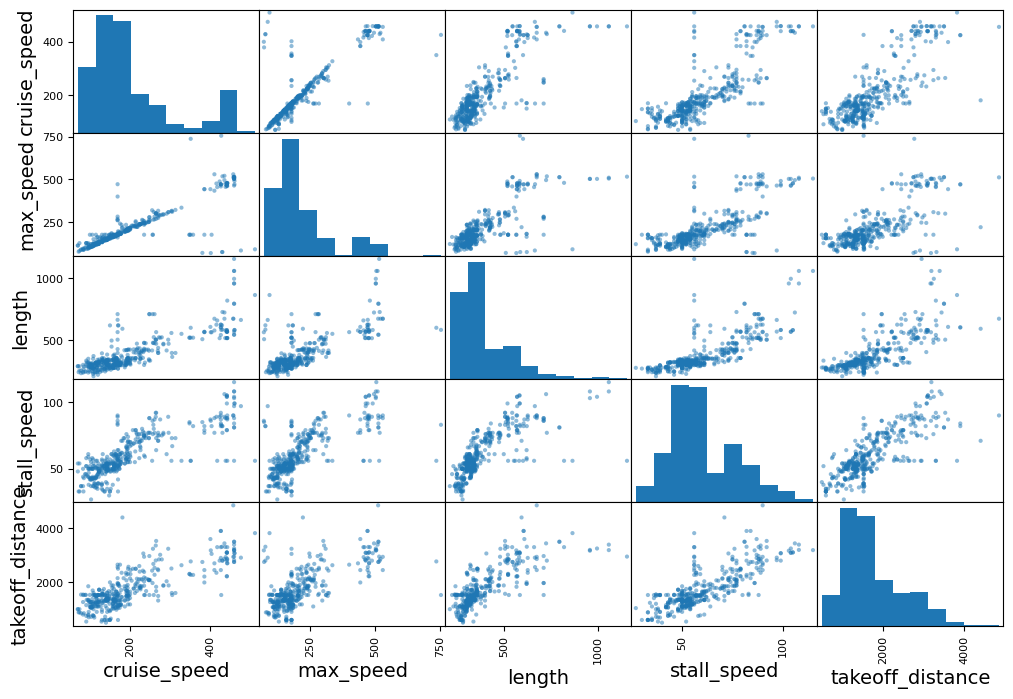

In [52]:
from pandas.plotting import scatter_matrix

attributes = ['cruise_speed', 'max_speed', 'length', 'stall_speed', 'takeoff_distance']
scatter_matrix(explore_df[attributes], figsize = (12, 8))
plt.show()

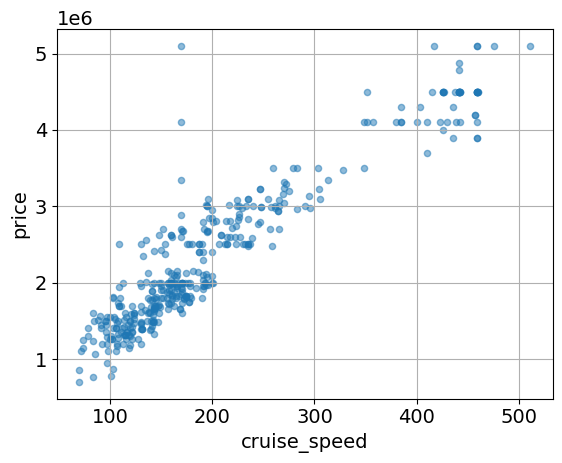

In [54]:
explore_df.plot(kind = 'scatter', x = 'cruise_speed', y = 'price', alpha = 0.5, grid = True)
plt.show()